In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.plot_keypoints import show_keypoints
from scipy.spatial.distance import euclidean

In [2]:
import openpifpaf

openpifpaf.show.Canvas.show = True
openpifpaf.show.Canvas.image_min_dpi = 50

predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16')

In [3]:
#fb_data = pd.read_csv('data/full_body.csv')
fb_data = pd.read_csv("data/angle_full_body.csv")

In [4]:
fb_data

,left_elbow,right_elbow,left_shoulder,right_shoulder,left_knee,right_knee
0,33.496592,-31.884595,26.520037,-27.518389,-1.364877,-3.509752
1,35.091741,-33.358072,25.278353,-26.531009,-0.645068,-3.512634
2,31.458374,-23.558121,27.467854,-27.029231,-0.907594,-3.771080
3,29.742848,-35.322548,25.392537,-26.246252,-0.363458,-2.475774
4,29.042956,-38.998432,26.556756,-26.056939,0.222259,-2.422938
...,...,...,...,...,...,...
23166,85.362963,-80.940329,62.656185,-59.416736,1.717570,0.453312
23167,85.374165,-80.976673,62.683847,-59.412642,1.702383,0.477324
23168,86.646180,-80.918448,62.707258,-59.376239,1.742637,0.412273
23169,88.081087,-81.175812,62.673484,-59.262814,1.685901,0.369728


# KMEANS

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(fb_data)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
labels.min(), labels.max()

(0, 3)

In [8]:
#import pickle

#model_filename = 'models/kmeans_model.pkl'
#with open(model_filename, 'wb') as model_file:
#    pickle.dump(kmeans, model_file)

In [34]:
# Salvar os centroides
center_points = []

for i in range(len(centers)):
    j_center = []
    for j in range(0, len(centers[i]), 2):
        j_center.append([centers[i][j], centers[i][j+1]])
    center_points.append(np.array(j_center))

In [35]:
for i in range(len(center_points)):
    show_keypoints(center_points[i], save_path=f'Results/KNNClusters/Cluster-{i}.jpg', show=False)

In [8]:
closest_points_df = pd.DataFrame(columns=fb_data.columns)

In [9]:
for center in centers:
    distances = fb_data.apply(lambda row: euclidean(row, center), axis=1)
    closest_point_idx = distances.idxmin()
    closest_points_df = closest_points_df.append(fb_data.loc[closest_point_idx])

/tmp/ipykernel_9152/1717676132.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_points_df = closest_points_df.append(fb_data.loc[closest_point_idx])
/tmp/ipykernel_9152/1717676132.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_points_df = closest_points_df.append(fb_data.loc[closest_point_idx])
/tmp/ipykernel_9152/1717676132.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_points_df = closest_points_df.append(fb_data.loc[closest_point_idx])
/tmp/ipykernel_9152/1717676132.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_points_df = closest_points_df.append(fb_data.loc[closest_point_idx])


In [10]:
closest_points_df

,left_elbow,right_elbow,left_shoulder,right_shoulder,left_knee,right_knee
7749,96.972791,-91.972483,23.424999,-25.549950,0.003386,0.536716
19999,-102.836837,94.513941,56.193534,-41.794540,-0.489885,5.152275
8292,90.354448,103.469651,30.363661,-23.268170,0.818170,-0.457613
5202,-75.591408,-81.164211,21.624794,-21.252679,0.824659,1.099485


In [11]:
closest_points_df.index

Int64Index([7749, 19999, 8292, 5202], dtype='int64')

In [32]:
org_fb_data = pd.read_csv('data/full_body.csv')
org_fb_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,670.79,278.54,672.53,276.80,669.33,276.84,675.25,277.91,667.14,277.75,...,663.08,311.66,671.87,333.78,661.95,333.37,669.33,353.90,658.41,353.79
1,670.59,278.36,672.35,276.72,669.16,276.74,675.20,277.91,667.10,277.68,...,663.10,311.44,671.51,333.73,661.97,333.11,669.15,353.84,658.44,353.46
2,670.50,278.39,672.29,276.75,669.06,276.78,675.09,277.89,666.95,277.59,...,663.07,311.42,671.51,333.85,661.94,333.21,669.08,353.98,658.33,353.18
3,670.49,278.43,672.24,276.77,668.98,276.81,675.09,277.92,666.81,277.74,...,663.03,311.28,671.26,333.48,661.58,331.99,668.91,353.41,658.26,352.93
4,670.54,278.39,672.16,276.70,668.93,276.77,674.87,277.80,666.57,277.89,...,662.88,311.34,671.12,333.49,661.34,331.94,669.10,353.39,658.04,352.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26464,461.05,53.93,463.20,51.32,458.48,51.65,466.68,53.76,455.18,54.67,...,456.13,108.14,475.97,143.02,451.48,145.44,482.53,174.69,448.06,176.54
26465,461.10,53.88,463.24,51.28,458.54,51.61,466.67,53.75,455.18,54.67,...,456.14,108.12,475.98,143.02,451.46,145.41,482.58,174.90,448.03,176.59
26466,461.09,53.89,463.25,51.28,458.53,51.61,466.69,53.75,455.19,54.67,...,456.12,108.15,475.99,143.01,451.49,145.39,482.64,174.85,448.03,176.58
26467,461.09,53.90,463.24,51.29,458.53,51.62,466.68,53.77,455.18,54.67,...,456.07,108.18,475.98,143.00,451.52,145.43,482.56,174.78,448.09,176.57


In [13]:
org_fb_data.loc[closest_points_df.index]

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
7749,353.45,80.86,357.62,76.85,349.06,76.95,364.06,80.21,342.92,80.56,...,341.50,172.18,368.85,224.73,335.21,225.06,371.44,275.06,330.10,275.52
19999,147.53,92.34,149.29,90.55,146.07,90.49,151.67,91.76,143.83,91.56,...,142.66,127.48,154.67,148.08,143.27,147.72,155.73,166.21,143.28,166.25
8292,320.20,48.98,327.36,42.91,314.78,42.75,339.93,46.88,309.19,47.32,...,301.45,183.49,342.98,252.56,300.78,255.60,346.13,331.30,298.19,329.49
5202,367.99,221.83,369.60,219.67,365.84,220.26,372.97,218.82,363.09,220.76,...,363.98,261.46,379.55,284.72,364.18,284.67,382.14,305.87,364.44,306.18


In [14]:
closest_points_df = org_fb_data.loc[closest_points_df.index]

In [30]:
for i in range(len(closest_points_df.values)):
    show_keypoints(closest_points_df.values[i].reshape(17,2), save_path=f'Results/KNNClusters/Cluster-{i}.jpg', show=False)

In [15]:
closest_points_df.values[0]

array([353.45,  80.86, 357.62,  76.85, 349.06,  76.95, 364.06,  80.21,
       342.92,  80.56, 375.03, 108.28, 332.77, 110.5 , 383.98, 137.54,
       324.1 , 143.84, 375.74, 140.87, 343.33, 143.97, 367.58, 172.76,
       341.5 , 172.18, 368.85, 224.73, 335.21, 225.06, 371.44, 275.06,
       330.1 , 275.52])

In [16]:
def read_json_files(folder_path):
    json_data = {}
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            json_data[filename] = []
            file_path = os.path.join(folder_path, filename)
            with open(file_path, "r") as file:
                for line in file:
                    try:
                        line_data = json.loads(line)
                        json_data[filename].append(line_data)
                    except json.JSONDecodeError:
                        print(f"Error parsing JSON line: {line}")
    
    return json_data


In [17]:
file_path = "Videos"
json_data = read_json_files(file_path)

In [18]:
centers_frames = []

In [19]:
for cp in closest_points_df.values: 
    found_condition = False
    for key in json_data:
        for item in json_data[key]:
            frame_index = item["frame"]
            predictions = item["predictions"]
            for prediction in predictions:
                keypoints = prediction["keypoints"]
                bbox = prediction["bbox"]
                score = prediction["score"]
                category_id = prediction["category_id"]

                keypoints_arr = np.array(keypoints).reshape(-1, 3)  # Reshape keypoints as (n, 3) array
                c_values = keypoints_arr[:, 2]  # Extract all c values
                keypoints_without_c = keypoints_arr[:, :2].reshape(-1,34)
                
                if np.allclose(keypoints_without_c, cp):
                    print(key, frame_index)
                    #print(keypoints_without_c)
                    centers_frames.append([key, frame_index, keypoints_without_c])
                    found_condition = True
                    break
            if found_condition:
                break
        if found_condition:
            break

How to spot a liar Pamela Meyer.mp4.openpifpaf.json 7817
The puzzle of motivation  Dan Pink.mp4.openpifpaf.json 14884
How to spot a liar Pamela Meyer.mp4.openpifpaf.json 11037
How to speak so that people want to listen Julian Treasure.mp4.openpifpaf.json 3711


In [20]:
keypoints = centers_frames[0][2].reshape(17,2)
keypoints

array([[353.45,  80.86],
       [357.62,  76.85],
       [349.06,  76.95],
       [364.06,  80.21],
       [342.92,  80.56],
       [375.03, 108.28],
       [332.77, 110.5 ],
       [383.98, 137.54],
       [324.1 , 143.84],
       [375.74, 140.87],
       [343.33, 143.97],
       [367.58, 172.76],
       [341.5 , 172.18],
       [368.85, 224.73],
       [335.21, 225.06],
       [371.44, 275.06],
       [330.1 , 275.52]])

In [46]:
#show_keypoints(center_points[1])

In [47]:
#show_keypoints(keypoints)

In [21]:
centers_frames[0][0].rsplit('.', 2)[0]

'How to spot a liar Pamela Meyer.mp4'

In [22]:
centers_frames[1][2]

array([[147.53,  92.34, 149.29,  90.55, 146.07,  90.49, 151.67,  91.76,
        143.83,  91.56, 156.04, 101.59, 139.77, 101.58, 159.09, 114.69,
        135.89, 113.87, 157.19, 120.95, 139.05, 114.79, 152.89, 127.59,
        142.66, 127.48, 154.67, 148.08, 143.27, 147.72, 155.73, 166.21,
        143.28, 166.25]])

In [23]:
import cv2

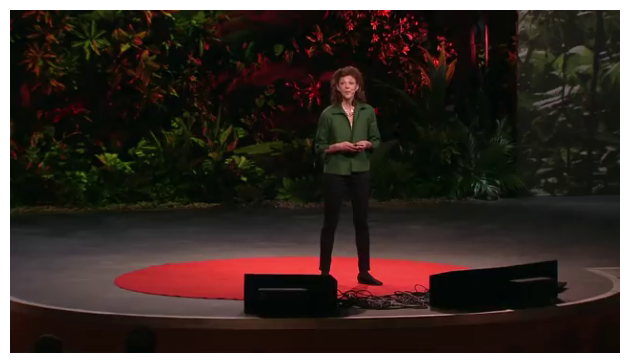

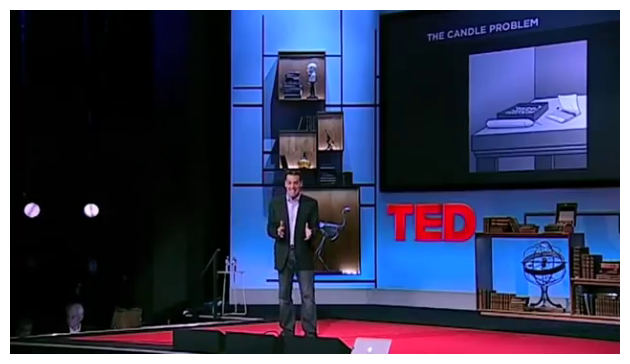

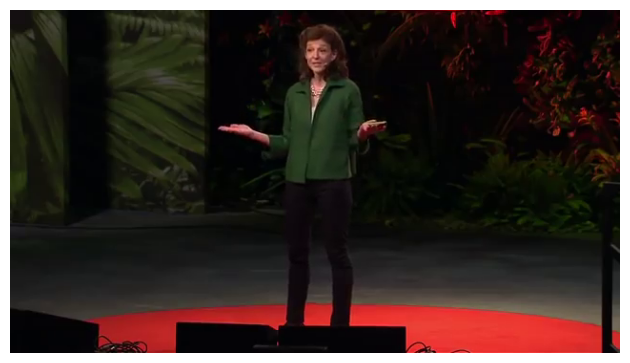

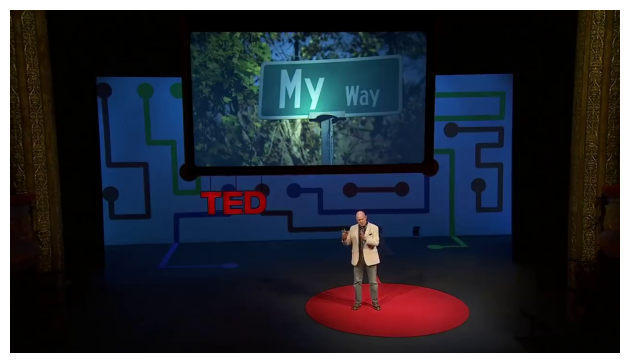

In [24]:
for i in range(len(centers_frames)):
    video_name = centers_frames[i][0].rsplit('.', 2)[0]
    video_path = f'Videos/{video_name}'

    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error opening video file")
        exit()

    target_frame_number = centers_frames[i][1]-1

    cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame_number)
    ret, frame = cap.read()

    if not ret:
        print("Error reading frame")
        exit()

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')  # Turn off axis labels and ticks
    #cv2.imwrite(f"Results/NearCenter/Cluster-{centers_frames[i]}.jpg", frame)
    plt.savefig(f"Results/NearCenter/Cluster-{i}.jpg", bbox_inches='tight', pad_inches=0)
    plt.tight_layout()
    #plt.show()
    cap.release()

    keypoints = centers_frames[i][2].reshape(17,2)
    show_keypoints(keypoints, save_path=f"Results/NearCenter/Cluster-{i}-Keypoints.jpg", show=False)
    